In [17]:
import csv
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef as MC
from sklearn.metrics import ConfusionMatrixDisplay as CMD
import matplotlib.pyplot as plt
from collections import Counter as Cnt
import geopandas as gpd
import pickle
import pandas as pd
import json
import random
import Utils
#matthews corrcoef https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [2]:
with open("../../country_data_final.pickle", 'rb') as handle:
    data = pickle.load(handle)
with open("../../mapillary/train.json") as file:
    metadata = json.load(file)

In [ ]:
#TODO
# use matthews corrcoef
# 

# NOTES
max100 states has the following "issues"

New Hampshire has 0 and District of Columbia is included with 100

'Oklahoma': 73,'Vermont': 7,'Nebraska': 68,'Maine': 92

In [6]:
result_file = "country100_results.csv"
# result_file =  "US_states_max100_results.csv"
# result_file = "city100_results.csv"
# result_file = "country100_results_test.csv"



In [22]:
gold, predicts, probs, filenames = Utils.read_resultcsv(result_file)
predict = [x[0] for x in predicts]


In [18]:
MC(gold,predict)

0.5068820988312078

Matthews corrcoef

country100: 0.51

US States 100: 0.42

City 100: 0.20



In [27]:
acc_list = {}
for g, p in zip(gold,predict):
    if g == p:
        acc_list.setdefault(g,0)
        acc_list[g]+=1
acc_list = [(x,y) for x,y in acc_list.items()]
acc_list.sort(reverse=True,key=lambda x : x[1])


In [19]:
# acc_list

In [22]:
# Cnt(gold) # For states t

In [23]:
#print(set(gold))

In [20]:
# Select specific labels to display and focus on. Other values are changed to label "other"
# selection = ['China', 'Japan', 'Sri Lanka','Australia','United Kingdom','Egypt','United States','Kosovo','Cyprus',"France"]
# selection = ['South Korea', 'Democratic Republic of the Congo', 'Nigeria', 'Haiti', 'Mozambique', 'Nicaragua', 'Luxembourg', 'Saint Lucia', 'Namibia', 'Barbados','United States', 'Australia', 'Japan', 'Brazil', 'Germany', 'Morocco', 'Thailand', 'France', 'South Africa', 'Colombia']
# selection = ['Belgium','South Korea', 'Democratic Republic of the Congo', 'Nigeria', 'Haiti', 'Mozambique', 'Nicaragua', 'Luxembourg', 'Saint Lucia', 'Namibia', 'Barbados','United States', 'Australia', 'Japan', 'Brazil', 'Germany', 'Morocco', 'Thailand', 'France', 'South Africa', 'Colombia']
selection = ["Namibia", 'Botswana', 'Zambia', 'Angola', 'South Africa', 'Zimbabwe', 'Mozambique','Democratic Republic of the Congo','Kenya','Ethiopia','Nigeria','Egypt']
# selection = ['Dubai','Abu Dhabi', 'Buenos Aires', 'Bangkok', 'Rio de Janeiro',  'Helsingborg','Boston', 'Detroit','Hamburg','Singapore','Berlin','Sydney','Rome','Los Angeles','Kyoto','Tokyo','New York'] 
# selection = ['Vermont', 'Alabama', 'Pennsylvania', 'Louisiana', 'North Carolina', 'Hawaii', 'New Mexico', 'Arizona', 'Minnesota', 'Missouri','New York']
predict = [x[0] for x in predicts]
goldsel, predsel = Utils.filter_classes(gold,predict,selection)


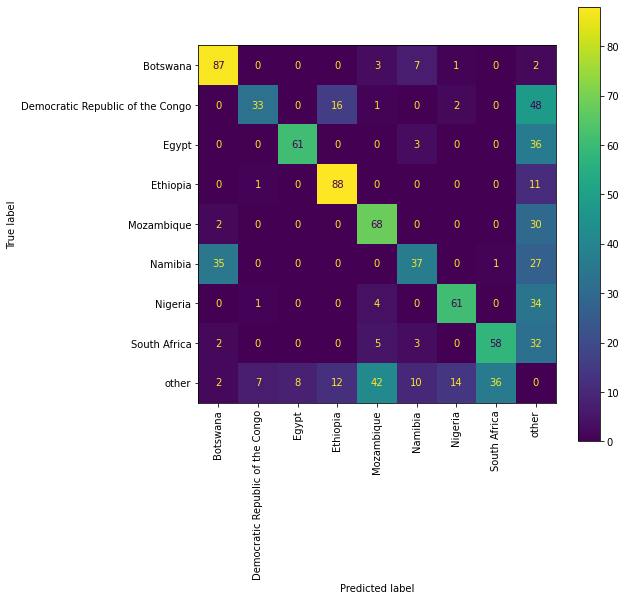

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax)
# plt.savefig("topbot10_count_CM_wbelg.png")

In [ ]:


fig, ax = plt.subplots(figsize=(21, 21))

CMD.from_predictions(gold,predict,xticks_rotation="vertical",ax=ax)#
# plt.savefig("allstate_CM.png")

In [25]:
# Select specific label to display and focus on. Other values are changed to label "other"
selection = "Namibia"
goldsel,predsel,indices = Utils.filter_classes_one(gold,predict,selection)

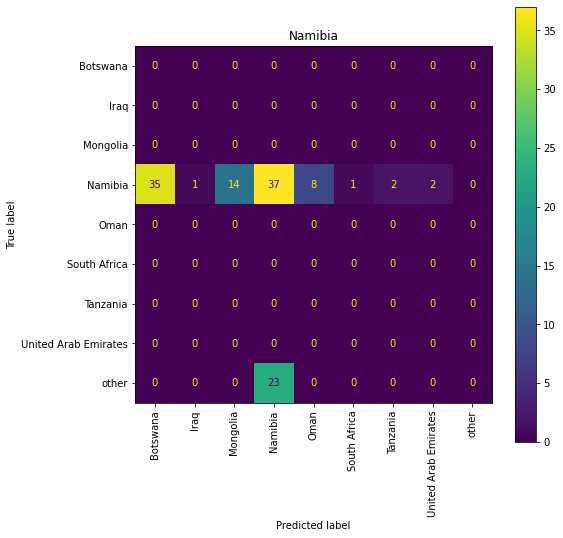

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title(selection)

CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax)

# Image plot

In [10]:
mon_list = [i for i in indices if predict[i]=="Mongolia"]
mon_list = [labelspair[i][3] for i in mon_list]
# mon_list = random.choices(mon_list,k=9)
with open(f"../figureinput/namibia_mong_conf.pickle", 'wb') as handle:
        pickle.dump(mon_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
import sys, os, pickle
from PIL import Image

img_src = "/home/data_shares/mapillary/train/"
img_list = sys.argv[1]
with open(os.path.join("../figureinput",img_list), 'rb') as handle:
    image_list = pickle.load(handle)
    
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
image_gen = iter(image_list)

plt.title(img_list[:-7])
for row in ax:
    for col in row:
        filename = next(image_gen)
        image = Image.open(os.path.join(img_src,filename+".jpg")).convert("RGB")
        col.imshow(image)

plt.tight_layout()
plt.savefig(os.path.join("../figures/", img_list[:-7]+".png"))


SyntaxError: invalid syntax (Temp/ipykernel_9536/1675685638.py, line 20)

In [3]:
test = list(data.keys())[0]

In [14]:
uniq_countries = set()
for file in data.keys():
    try:
        uniq_countries.add(data[file]["country"])
    except:
        pass
                           

In [ ]:
uniq_countries_list =  list(uniq_countries)
uniq_countries_list.sort()
for country in uniq_countries_list:
   


In [4]:
gold, preddicts, probs, filenames = Utils.read_resultcsv("country100_results.csv")